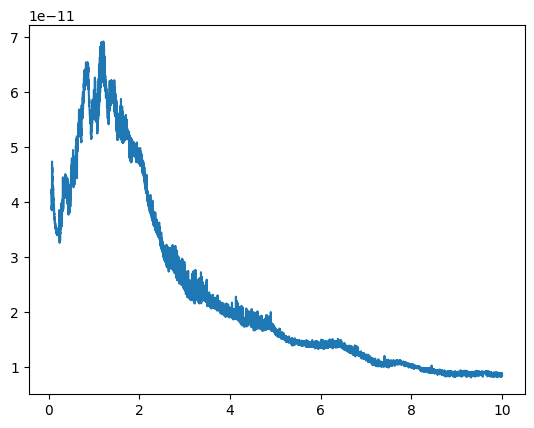

In [1]:
import numpy as np
import matplotlib.pyplot as plt

name = 'logSimulacion'

residuals = open(name)

T = 10 #Tiempo total de la simulación
dt = 0.001 #Delta de tiempo
points = int(T/dt)

time = np.zeros(points)
k = -1

for line in residuals:
    line = line.rstrip()
    separation = line.split()

    if not 'Time' in separation:
        continue
    elif ':' in separation:
        continue
    else:
        k += 1
        #words = line.split()
        target = separation[2]
        time[k] = float(target)

residuals.close()

residuals = open(name)

num_iterations = 3
Res_Ux = np.zeros(points)

LINE = residuals.readlines()

count = -1
k = -1 
for i in LINE:
    count += 1
    if not i.startswith('PIMPLE:'):
        continue
    elif '{}'.format(num_iterations) != i.split()[2]:
        continue
    else:
        k += 1
        phrase = LINE[count+1]
        words = phrase.split()
        target = words[11]
        number = target.split(',')
        Res_Ux[k] = float(number[0])

residuals.close()

plt.plot(time[50:points], Res_Ux[50:points])
plt.show()
